In [1]:
from plotting import plot_network, plot_latents, draw_layout_plot, draw_multiplot, GraphColormap

In [2]:
import numpy as np

In [3]:
A = np.random.rand(50,50)
B = np.random.rand(50, 50)

In [4]:
A.shape

(50, 50)

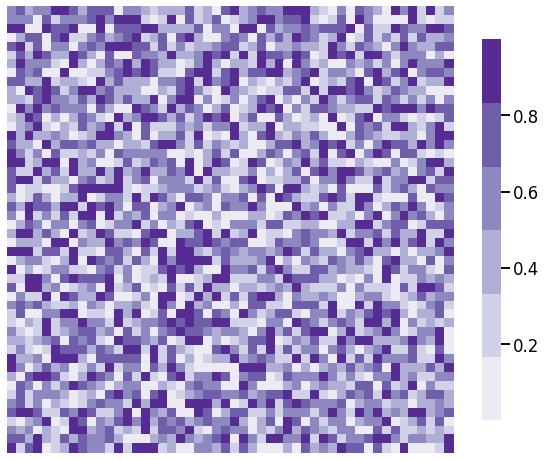

In [5]:
plot_network(A, labels=None, color="sequential")

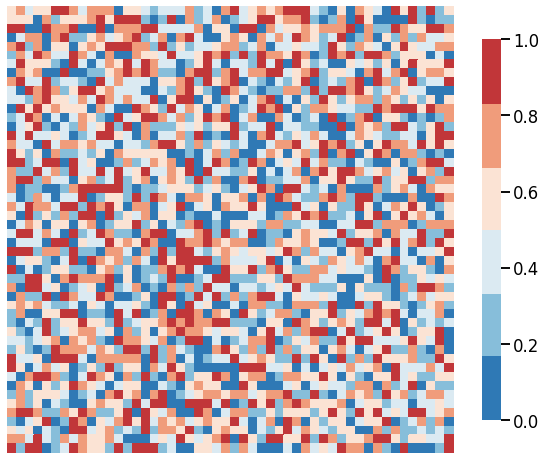

In [6]:
plot_network(A, vmin=0, center=.5, vmax=1, labels=None, color="divergent")

In [7]:
A = np.random.rand(20, 2)
labels=[1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5]

<AxesSubplot:>

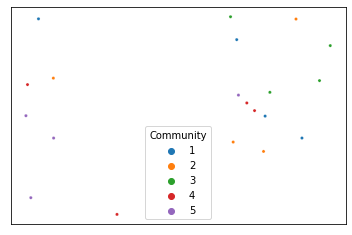

In [8]:
plot_latents(A, labels=labels)

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

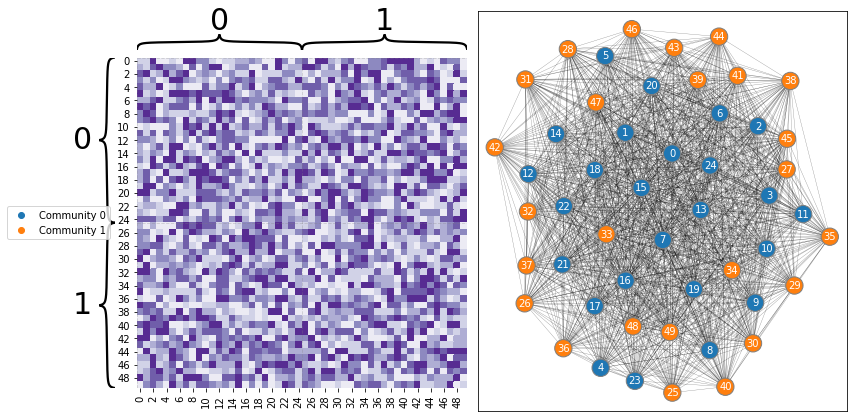

In [9]:
draw_multiplot(B, labels=[0 for i in range(0, 25)] + [1 for i in range(0, 25)])

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

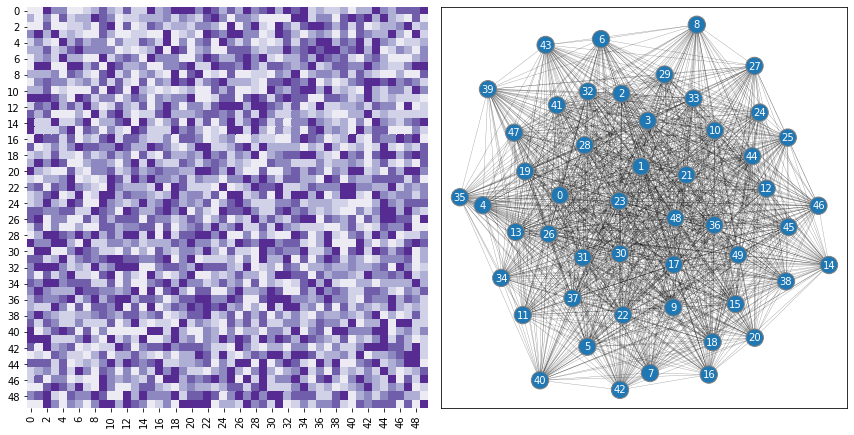

In [18]:
draw_multiplot(B)

In [19]:

cmaps = {"sequential": "Purples", "divergent": "RdBu_r", "qualitative": "tab10"}
import networkx as nx
from matplotlib import pyplot as plt

In [20]:
def draw_layout_plot(A, ax=None, pos=None, labels=None, node_color="qualitative"):
    if node_color not in cmaps.keys():
        raise ValueError(f"Your `node_color` must be in {list(cmaps.keys())}")

    G = nx.Graph(A)

    if ax is None:
        fig, ax = plt.subplots()
    if pos is None:
        pos = nx.spring_layout(G)
    else:
        pos = pos(G)

    options = {"edgecolors": "tab:gray", "node_size": 300}

    if labels is not None:
        n_unique = len(np.unique(labels))
        lab_dict = {}
        for j, lab in enumerate(np.unique(labels)):
            lab_dict[lab] = j
        cm = GraphColormap(node_color, discrete=True, k=n_unique)
        node_colors = [cm.palette[lab_dict[i]] for i in labels]
        commlist = [plt.Line2D((0, 1), (0, 0), color=cm.palette[col], marker='o', linestyle='') for lab, col in lab_dict]
        namelist = ["Community " + str(lab) for lab in lab_dict.keys()]
    else:
        cm = GraphColormap(node_color, discrete=True, k=1)
        node_colors = [cm.palette[0] for i in range(0, A.shape[0])]
    # draw
    nodes_plt = nx.draw_networkx_nodes(G, node_color=node_colors, pos=pos, ax=ax, **options)
    nx.draw_networkx_edges(G, alpha=0.5, pos=pos, width=0.3, ax=ax)
    nx.draw_networkx_labels(G, pos, font_size=10, font_color="white", ax=ax)
    
    if labels is not None:
        plt.legend(commlist, namelist)

    plt.tight_layout()

    return ax

TypeError: cannot unpack non-iterable numpy.int64 object

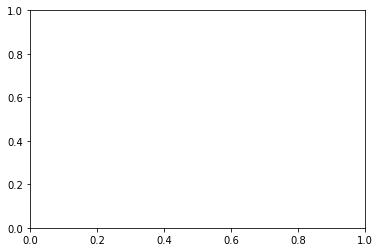

In [21]:
draw_layout_plot(B, labels=[0 for i in range(0, 25)] + [1 for i in range(0, 25)])

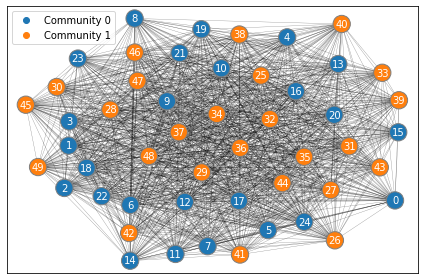

In [29]:
A = B; labels=[0 for i in range(0, 25)] + [1 for i in range(0, 25)]
pos = None; node_color="qualitative"
ax = None

if node_color not in cmaps.keys():
    raise ValueError(f"Your `node_color` must be in {list(cmaps.keys())}")

G = nx.Graph(A)

if ax is None:
    fig, ax = plt.subplots()
if pos is None:
    pos = nx.spring_layout(G)
else:
    pos = pos(G)

options = {"edgecolors": "tab:gray", "node_size": 300}

if labels is not None:
    n_unique = len(np.unique(labels))
    lab_dict = {}
    for j, lab in enumerate(np.unique(labels)):
        lab_dict[lab] = j
    cm = GraphColormap(node_color, discrete=True, k=n_unique)
    node_colors = [cm.palette[lab_dict[i]] for i in labels]
    commlist = [plt.Line2D((0, 1), (0, 0), color=cm.palette[col], marker='o', linestyle='') for lab, col in lab_dict.items()]
    namelist = ["Community " + str(lab) for lab in lab_dict.keys()]
else:
    cm = GraphColormap(node_color, discrete=True, k=1)
    node_colors = [cm.palette[0] for i in range(0, A.shape[0])]
# draw
nodes_plt = nx.draw_networkx_nodes(G, node_color=node_colors, pos=pos, ax=ax, **options)
nx.draw_networkx_edges(G, alpha=0.5, pos=pos, width=0.3, ax=ax)
nx.draw_networkx_labels(G, pos, font_size=10, font_color="white", ax=ax)

if labels is not None:
    plt.legend(commlist, namelist)

plt.tight_layout()


In [25]:
[print(lab) for lab, col in lab_dict.items()]

0
1


[None, None]

In [28]:
lab = 0
col=0
plt.Line2D((0, 1), (0, 0), color=cm.palette[col], marker='o', linestyle='')